Задание: тип визуализации данных

Загрузите данные по ЕГЭ за последние годы
https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv
выберите данные за 2018-2019 учебный год.

Выберите тип диаграммы для отображения результатов по административному округу Москвы, постройте выбранную диаграмму для количества школьников, написавших ЕГЭ на 220 баллов и выше.

Выберите тип диаграммы и постройте ее для районов Северо-Западного административного округа Москвы для количества школьников, написавших ЕГЭ на 220 баллов и выше.

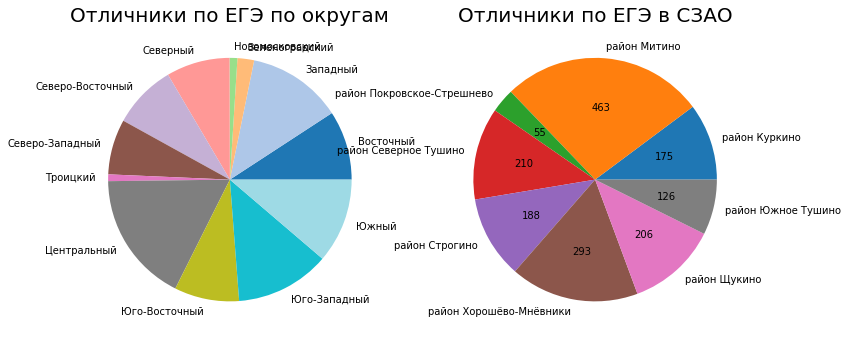

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# загрузим данные в датафрейм
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")
data.dropna # удалим пустые строки
data = data[data["YEAR"] == "2018-2019" ]  # отфильтруем по учебному году 
data["AdmArea"] = data["AdmArea"].apply(lambda x: x.split(" ")[0])  # оставим только название округа
#print(area_group)

# Выберите тип диаграммы для отображения результатов по административному округу Москвы, постройте выбранную диаграмму для количества школьников, написавших ЕГЭ на 220 баллов и выше.

# Выберем круговую диаграмму, отрисуем распределение по округам Москвы
fig = plt.figure(figsize=(12, 12))  # создали холст 
area = fig.add_subplot(1, 2, 1) # разделим холс на две равные части  
area.set_title("Отличники по ЕГЭ по округам", fontsize=20)
area_group = data.groupby("AdmArea").sum("PASSES_OVER_220")["PASSES_OVER_220"]  # суммировали по акругам всех  у кого ЕГЭ более 220
area_group.plot.pie(ax=area, label="", cmap="tab20")

#Выберите тип диаграммы и постройте ее для районов Северо-Западного административного округа Москвы для количества школьников, написавших ЕГЭ на 220 баллов и выше.

# Выберем круговую диаграмму, отрисуем распределение по СЗАО
area = fig.add_subplot(1, 2, 2)
area.set_title("Отличники по ЕГЭ в СЗАО", fontsize=20)
sz_area = data[data["AdmArea"] == "Северо-Западный"]  # фильтруем данные выбрав только Северо-Западный округ
sz_area = sz_area.groupby("District").sum("PASSES_OVER_220")["PASSES_OVER_220"]  # групируем по районам суммируя отличников
total = sum(sz_area)  # посчитаем сколько все отличников, это нужно будет чтобы нанести на диаграмму количество отличников в каждом районе
sz_area.plot.pie(ax=area, label="", autopct=lambda x: int(round(total * x/100)))  # строим диаграмму через autopct на диаграмму наносим количество отличников в каждом районе
plt.show() 
# print(sz_area)
